In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools")
from maths.algebra import  CurveFitting
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams["font.size"] = 16

## Polynomial

In [2]:
cf = CurveFitting()

In [9]:
data = pd.read_csv("data.csv")
data

,theta,I,theta-mean,I/I_max
0,74.0,0.4,-7.0,0.014706
1,74.8,0.7,-6.2,0.025735
2,75.2,0.9,-5.8,0.033088
3,75.6,1.2,-5.4,0.044118
4,76.0,1.6,-5.0,0.058824
5,76.4,2.2,-4.6,0.080882
6,76.6,2.8,-4.4,0.102941
7,76.8,3.1,-4.2,0.113971
8,77.0,3.4,-4.0,0.125000
9,77.2,4.0,-3.8,0.147059


In [5]:
X = data["theta2"]
Y = data["I_n"]

In [6]:
params = cf.fit(X, Y, 12)
coeffs = params[0]
A = coeffs[0]
b1 = -coeffs[2]
b2 = (coeffs[4]*2)**0.5
b3 = np.power((-coeffs[6]*6), 1/3)
b = -np.mean(np.array([b1, b2, b3]))
A, b

(0.9832651738331244, -0.12344453689792088)

In [7]:
X_new = np.linspace(X.min(), 8, 200)
e = 2.718281828459045

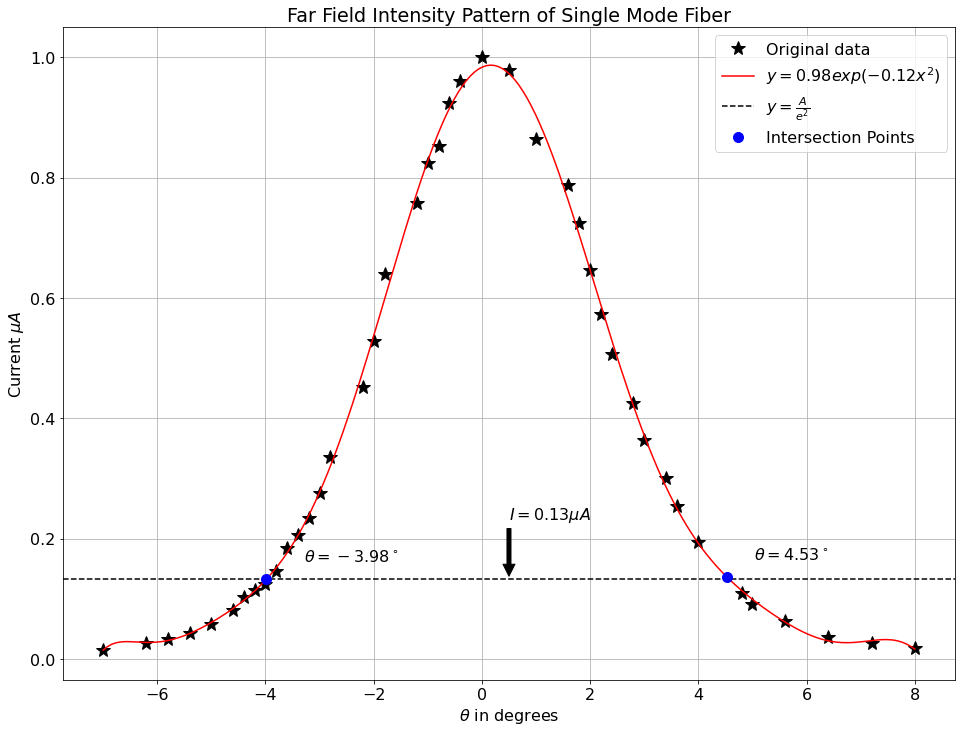

In [8]:
plt.figure(figsize=(16, 12))
y_pred = cf.predict(X_new)
plt.plot(X[:-1], Y[:-1], "*k", label="Original data", markersize=15)
curve_eq = fr"$y = {A:.2f}exp({b:.2f}x^2)$"
plt.plot(X_new, y_pred, "r-", label=curve_eq)
p2 = A/e**2
plt.axhline(p2, color="k", linestyle="--", label=r"$y = \frac{A}{e^2}$")
plt.annotate(fr"$I={p2:.2f}\mu A$", xy=(0.5, p2), xytext=(0.5, p2+0.1), arrowprops=dict(facecolor='black', shrink=0.05))
idx = np.isclose(y_pred, p2, atol=0.003)
inter_x = X_new[idx]
inter_y = y_pred[idx]
plt.plot(inter_x, inter_y, "bo", label="Intersection Points", markersize=10)
plt.annotate(fr"$\theta = {inter_x[0]:.2f}^\circ$", (inter_x[0]+0.7, inter_y[0]+0.03))
plt.annotate(fr"$\theta = {inter_x[1]:.2f}^\circ$", (inter_x[1]+0.5, inter_y[1]+0.03))
plt.xlabel(r"$\theta$ in degrees")
plt.ylabel("Current $\mu A$")
plt.legend()
plt.grid()
plt.title("Far Field Intensity Pattern of Single Mode Fiber")
# plt.show()
plt.savefig("plot.pdf")

In [9]:
theta_avg = (np.abs(inter_x[0])+np.abs(inter_x[1]))/2
theta_avg

4.258793969849246

In [10]:
lambd = 632.8e-3
omega_0 = lambd/(np.pi*np.tan(np.deg2rad(theta_avg)))
omega_0, 2*omega_0

(2.704903334442473, 5.409806668884946)

In [16]:
data.drop("S", axis=1, inplace=True)

In [19]:
data[3:-3].to_html("data_final.html", index=False, justify="center", classes="table table-striped table-hover table-bordered")

## Using `scipy`

In [ ]:
x = data["theta-mean"]
y = data["I/I_max"]

In [ ]:
def func(x, a, b):
    return a*np.exp(-b*x**2)

In [ ]:
popt, pcov = curve_fit(func, x, y)
popt

array([0.96030397, 0.11737488])

In [ ]:
A = popt[0]
b = popt[1]
e = 2.718281828459045

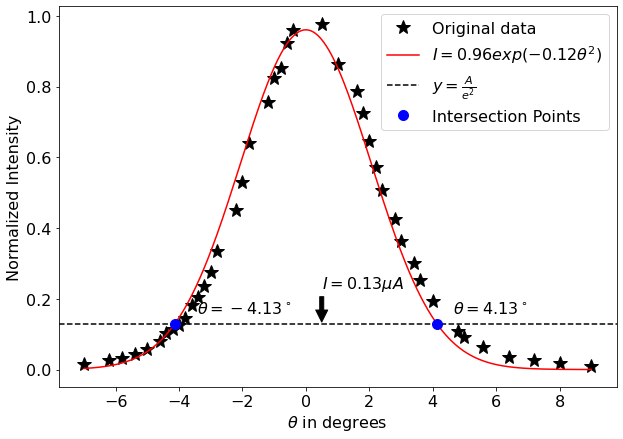

In [ ]:
x2 = np.linspace(x.min(), x.max(), 1000)
y_pred = func(x2, *popt)
plt.plot(x, y, "*k", label="Original data", markersize=15)
plt.plot(x2, y_pred, "r-", label=f"$I = {popt[0]:.2f}exp(-{popt[1]:.2f}\\theta^2)$")
p2 = A/e**2
plt.axhline(p2, color="k", linestyle="--", label=r"$y = \frac{A}{e^2}$")
plt.annotate(fr"$I={p2:.2f}\mu A$", xy=(0.5, p2), xytext=(0.5, p2+0.1), arrowprops=dict(facecolor='black', shrink=0.05))
idx = np.isclose(y_pred, p2, atol=0.001)
inter_x = x2[idx]
inter_y = y_pred[idx]
plt.plot(inter_x, inter_y, "bo", label="Intersection Points", markersize=10)
plt.annotate(fr"$\theta = {inter_x[0]:.2f}^\circ$", (inter_x[0]+0.7, inter_y[0]+0.03))
plt.annotate(fr"$\theta = {inter_x[1]:.2f}^\circ$", (inter_x[1]+0.5, inter_y[1]+0.03))
plt.xlabel(r"$\theta$ in degrees")
plt.ylabel("Normalized Intensity")
plt.legend()

## NA

$$
NA = \frac{r}{\sqrt{r^2+d^2}}
$$

In [20]:
NA = pd.read_csv("NA.csv")

In [21]:
NA["r"] = NA["D"]/2
NA["NA"] = NA["r"]/(np.sqrt(NA["r"]**2 + NA["z"]**2))
NA["NA"]

0    0.231875
1    0.232990
2    0.231621
3    0.240514
4    0.242536
5    0.244277
6    0.245792
7    0.244067
Name: NA, dtype: float64

In [22]:
NA_avg = NA["NA"].mean()
NA_avg

0.2392089342945001

In [24]:
NA.to_html("NA_final.html", index=False, justify="center", classes="table table-striped table-hover table-bordered")